In [1]:
# loading the dataset
import numpy as pd
import pandas as pd
import seaborn as sns

In [2]:
full_pumpkins = pd.read_csv("US-pumpkins.csv")

In [3]:
full_pumpkins.head(5)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [4]:
# Selecting useful columns of the dataset
columns_to_select = ["City Name",  "Package", "Variety", "Origin", "Item Size", "Color"]


In [5]:
pumpkins = full_pumpkins.loc[:, columns_to_select]

In [6]:
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
0,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
1,BALTIMORE,24 inch bins,NaN,MARYLAND,lge,NaN
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE


In [7]:
# Checking for empty features of the pumpkins set
pumpkins.isnull().sum()

City Name      0
Package        0
Variety        5
Origin         3
Item Size    279
Color        616
dtype: int64

In [8]:
# Dropping any missing rules of the dataset
pumpkins.dropna(inplace = True)

In [9]:
pumpkins.head()

,City Name,Package,Variety,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,HOWDEN TYPE,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,HOWDEN TYPE,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,HOWDEN TYPE,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,HOWDEN TYPE,MARYLAND,med,ORANGE


In [10]:
pumpkins.isnull().sum()

City Name    0
Package      0
Variety      0
Origin       0
Item Size    0
Color        0
dtype: int64

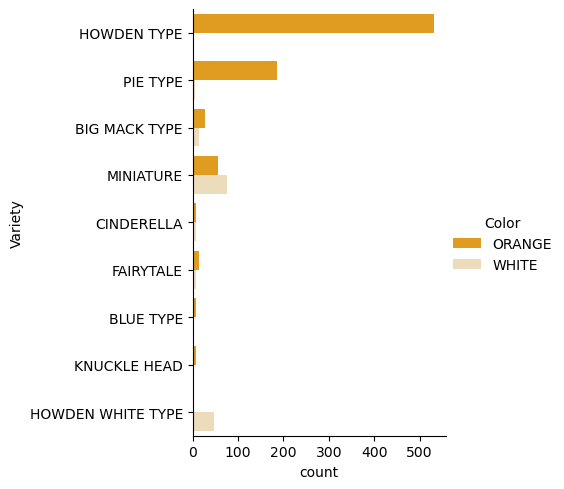

In [11]:
# Plotting the different color plots for
palette = { "ORANGE": "orange", "WHITE":"wheat"}

# Visualizing how many pumpkins of each variety are orange and white
sns.catplot(data = pumpkins, y = "Variety", hue = "Color", kind = "count", palette = palette)

In [12]:
# Checking the pumpkins sizes
pumpkins["Item Size"].unique()

array(['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo'],
      dtype=object)

In [13]:
# Encoding the Item size of the  dataset using the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
item_size_categ = [['med', 'lge', 'sml', 'xlge', 'med-lge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories = item_size_categ)

In [14]:
# Encoding the other categorical features of the dataset without an implied order
pumpkins.columns

Index(['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color'], dtype='object')

In [23]:
# Encoding the other categorical features of the dataset without an implied order
from sklearn.preprocessing import OneHotEncoder
categorial_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output = False)

In [25]:
# Applying the ColumnTransformer
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [("ord", ordinal_encoder, ordinal_features), ("cat", categorical_encoder,categorial_features )])

In [26]:
# Gettng the encoded features as a pandas dataframe
ct.set_output(transform = 'pandas')
encoded_features = ct.fit_transform(pumpkins)
encoded_features.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Applying LabelEncoding to the dataset
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins["Color"])
encoded_pumpkins = encoded_features.assign(Color = encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
# Checking the mapping bewteen the encoded values and the original dataset
list(label_encoder.inverse_transform([0,1]))

['ORANGE', 'WHITE']

### This implies that "ORANGE" : 0 and "WHITE: 1 

C:\Users\hp\AppData\Local\Temp\ipykernel_36768\1415753592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data= pumpkins, x = "Item Size", y = "Color", row = "Variety", kind = "box", orient = "h",
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


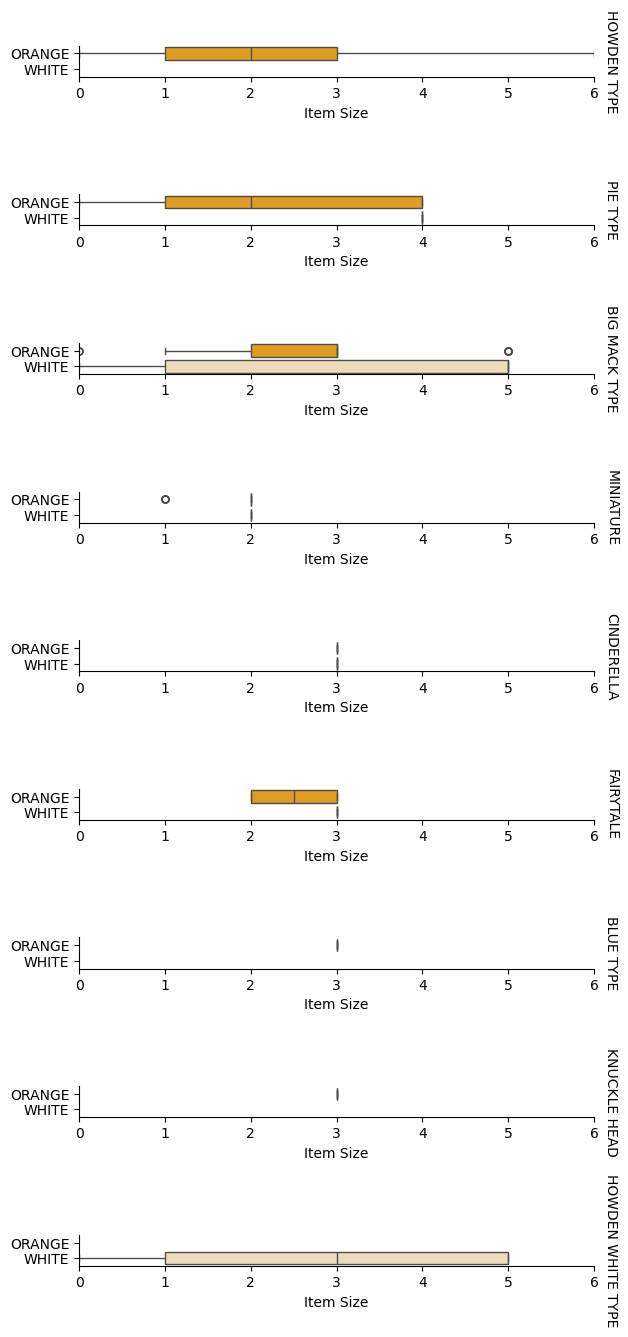

In [30]:
palette = { "ORANGE": "orange", "WHITE":"wheat"}

# We use the encoded Item Size column to use as the x-axis values of the plot
pumpkins["Item Size"] = encoded_pumpkins["ord__Item Size"]

g = sns.catplot(data= pumpkins, x = "Item Size", y = "Color", row = "Variety", kind = "box", orient = "h", 
                sharex = False, margin_titles = True, height = 1.5, aspect = 4, palette = palette)

# Defining the axis labels
g.set(xlabel = "Item Size", ylabel = "").set(xlim = (0,6))
g.set_titles(row_template = "{row_name}")

## Implementing the Logistic Regression Model On the Pumpkins Dataset

In [31]:
from sklearn.model_selection import train_test_split

X = encoded_pumpkins.drop(columns = ["Color"])

In [32]:
y = encoded_pumpkins["Color"]

In [33]:
X.head(5)

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_MICHIGAN,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
y.head(5)

2    0
3    0
4    0
5    0
6    0
Name: Color, dtype: int32

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [41]:
# Loading the Logistic Regression Model for training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [37]:
Model = LogisticRegression()
Model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred = Model.predict(X_test)

In [40]:
# Evaluating Model's performance
print(classification_report(y_test, y_pred))

print("Predicted Labels", y_pred)

print("F1-Score", f1_score(y_test, y_pred))
    

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       157
           1       0.83      0.69      0.75        42

    accuracy                           0.90       199
   macro avg       0.87      0.83      0.85       199
weighted avg       0.90      0.90      0.90       199

Predicted Labels [0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 0]
F1-Score 0.7532467532467533


In [42]:
# Importing the confusion to see the distribution of the dataset
confusion_matrix(y_test, y_pred)

array([[151,   6],
       [ 13,  29]], dtype=int64)

### Analysing the Performance of the Model Using ROC Curves

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib

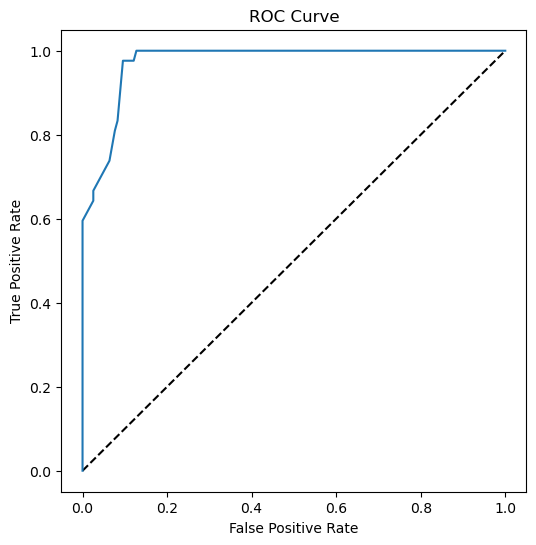

In [47]:
y_score = Model.predict_proba(X_test)
# determining the roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_score[:,1])
# Plotting the roc curve
fig = plt.figure(figsize =(6,6))
# Plotting the data points
plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [48]:
# Calculating the area under the curve using auc score function
auc = roc_auc_score(y_test, y_score[:,1])
auc

0.97300576281468

### This shows that our model will be able to make good predictions on the actual testing dataset since auc is close to 1